In [37]:
import googleapiclient.discovery
import spacy
from spacy_langdetect import LanguageDetector
import pandas as pd

from spacy.language import Language
import re
from spacytextblob.spacytextblob import SpacyTextBlob

from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [54]:
df = pd.read_csv('data/dataframes/mmyhYRgDnvQ.csv')

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import emoji

In [56]:
# df[['comment','polarity','polarity_vader']]

def get_polarity_vader(comment):
    analyzer = SentimentIntensityAnalyzer()
    emoji_dict = {e: emoji.demojize(e) for e in comment if e in emoji.EMOJI_DATA}
    
    comment = comment.replace('\n', '')  
    
    # Pré-traitement des emojis
    comment = emoji.demojize(comment)
    
    # Analyse de la polarité
    scores = analyzer.polarity_scores(comment)
    return scores['compound']

df['polarity_vader'] = df['comment'].apply(get_polarity_vader)



In [64]:
df[['comment', 'polarity', 'polarity_vader']].head(30)

,comment,polarity,polarity_vader
0,Kanyee,0.000000,0.0000
1,ahah le t-shirt du règlement incroyable,0.000000,0.0000
2,6heu,0.000000,0.0000
3,cool,0.350000,0.3182
4,ta des instrus sympa cool magnifique,0.350000,0.3182
5,mon juju roi président pouvoir mme Brigitte po...,0.466667,0.5994
6,J'ai adoré la vidéo 👍👍,0.100000,0.0000
7,"Bonjour, quelle est la musique utilisé sur Zoo...",0.000000,0.0000
8,Oh non le lien du CROU marche plus,0.000000,0.0000
9,C'est quoi le premier site ?😂,0.000000,0.0000


In [62]:
df[df['comment'].str.contains('vpn', case=False)][['comment', 'polarity', 'polarity_vader']]

,comment,polarity,polarity_vader
25,Attention NordVpn font de la publicité mensong...,0.000000,0.0000
27,Mdrrrrrr sa parle de nordvpn mais il faut s’y ...,0.000000,0.0000
74,Nord VPN à encore frappé,0.000000,0.0000
151,Pas terrible le partenariat avec Nord VPN... a...,-1.000000,-0.4767
152,"Dislike, deso mais j'en ai marre de voir nordV...",0.000000,-0.3818
...,...,...,...
1320,Je parie 50e que cest sponsorisé par Nord vpn,0.000000,0.0000
1325,ils commencent à casser les couilles ces putai...,0.000000,0.0000
1344,Tout plein de youtubers que je connais font un...,0.333333,0.5267
1345,Ils sont tous sponso par Nordvpn 😂,0.000000,0.0000


In [ ]:
# Remplacez par votre clé API YouTube
API_KEY = ""
VIDEO_ID = "IBcUkTXAwbw"

def obtenir_commentaires(video_id, api_key):
    youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)
    commentaires = []
    requete = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        textFormat="plainText",
        maxResults=100
    )
    reponse = requete.execute()

    while reponse:
        for item in reponse["items"]:
            commentaire = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
            commentaires.append(commentaire)

        # Pagination
        if "nextPageToken" in reponse:
            requete = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                textFormat="plainText",
                pageToken=reponse["nextPageToken"],
                maxResults=100
            )
            reponse = requete.execute()
        else:
            break

    return commentaires

# Appel de la fonction
commentaires = obtenir_commentaires(VIDEO_ID, API_KEY)

# # Affichage des commentaires
# for commentaire in commentaires:
#     print(commentaire)


Langue
Emojis
MAJUSCULE/minuscule
Argot 

In [21]:
# Convert the list of comments into a DataFrame
df_commentaires = pd.DataFrame(commentaires, columns=['comment'])

# Display the DataFrame
df_commentaires.head()

,comment
0,😊when bad omens breaks bad shit gets really re...
1,"@0:43 Misheard lyric i hear: ""SALT! AND THE N-..."
2,🖤🖤🖤🖤
3,Noah stil good scream i mean
4,I love it when grown men scream :3 need more h...


In [22]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

@Language.factory("language_detector")
def get_lang_detector(nlp, name):
    return LanguageDetector()
nlp.add_pipe("language_detector")

def detect_language_spacy(comment):
    doc = nlp(comment)
    return doc._.language["language"]

def clean_comment(comment):
    # Supprimer les emojis
    comment = re.sub(r'[^\w\s,]', '', comment, flags=re.UNICODE)
    # Retirer les liens
    comment = re.sub(r'http\S+|www.\S+', '', comment)
    # Retirer les caractères spéciaux et ponctuation
    comment = re.sub(r'[^a-zA-Zа-яА-Я0-9\s]', '', comment)    
    return comment

# Fonction pour obtenir le score de sentiment
def get_polarity(comment):
    doc = nlp(comment)
    return doc._.blob.polarity  # Polarity donne le score de sentiment de -1 (négatif) à 1 (positif)

def get_subjectivity(comment):
    doc = nlp(comment)
    return doc._.blob.subjectivity  # Subjectivity donne le score de subjectivité de 0 (objectif) à 1 (subjectif)

def get_assessments(comment):
    doc = nlp(comment)
    return doc._.blob.sentiment_assessments.assessments  # Assessments donne le score de sentiment de -1 (négatif) à 1 (positif)

def extract_keywords(text):
    doc = nlp(text)
    # Extraire les noms et adjectifs uniquement
    keywords = [token.text for token in doc if token.pos_ in ['NOUN', 'ADJ']]
    return keywords
    

In [ ]:
df_commentaires['cleaned_comment'] = df_commentaires['comment'].apply(clean_comment)
df_commentaires['language_on_brut_text'] = df_commentaires['comment'].apply(detect_language_spacy)
# df_commentaires['language_on_cleaned_text'] = df_commentaires['cleaned_comment'].apply(detect_language_spacy)
df_commentaires['polarity_on_brut_text'] = df_commentaires['comment'].apply(get_polarity)
# df_commentaires['polarity_on_cleaned_text'] = df_commentaires['cleaned_comment'].apply(get_polarity)
df_commentaires['subjectivity_on_brut_text'] = df_commentaires['comment'].apply(get_subjectivity)
# df_commentaires['subjectivity_on_cleaned_text'] = df_commentaires['cleaned_comment'].apply(get_subjectivity)
df_commentaires['assessments_on_brut_text'] = df_commentaires['comment'].apply(get_assessments)
# df_commentaires['assessments_on_cleaned_text'] = df_commentaires['cleaned_comment'].apply(get_assessments)
df_commentaires['keywords'] = df_commentaires['cleaned_comment'].apply(extract_keywords)

In [24]:
# df_commentaires[df_commentaires['language_on_brut_text'] != df_commentaires['language_on_cleaned_text']]

In [25]:
df_commentaires.head()

,comment,cleaned_comment,language_on_brut_text,polarity_on_brut_text,subjectivity_on_brut_text,assessments_on_brut_text,keywords
0,😊when bad omens breaks bad shit gets really re...,when bad omens breaks bad shit gets really real,en,-0.350000,0.583333,"[([bad], -0.6999999999999998, 0.66666666666666...","[bad, omens, bad, shit, real]"
1,"@0:43 Misheard lyric i hear: ""SALT! AND THE N-...",043 Misheard lyric i hear SALT AND THE NER GLO...,en,0.595313,0.675000,"[([lyric, !, !], 0.390625, 0.65, None), ([lol]...","[lyric, lol]"
2,🖤🖤🖤🖤,,UNKNOWN,0.000000,0.000000,[],[]
3,Noah stil good scream i mean,Noah stil good scream i mean,en,0.193750,0.643750,"[([good], 0.7, 0.6000000000000001, None), ([me...","[stil, good, scream]"
4,I love it when grown men scream :3 need more h...,I love it when grown men scream 3 need more he...,en,0.341667,0.648333,"[([love], 0.5, 0.6, None), ([:3], 0.5, 1.0, mo...","[men, heavier, stuff, fr]"


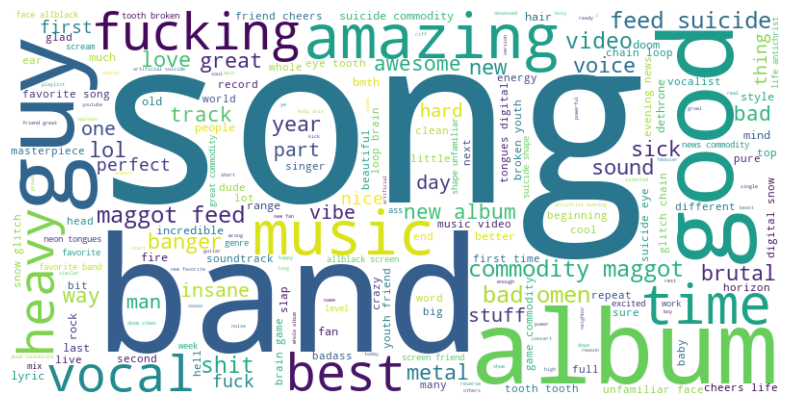

In [26]:
all_keywords = sum(df_commentaires['keywords'], [])

all_keywords_text = " ".join(all_keywords)

# Créer et afficher le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keywords_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
global_polarity = df_commentaires['polarity_on_brut_text'].mean()
global_subjectivity = df_commentaires['subjectivity_on_brut_text'].mean()

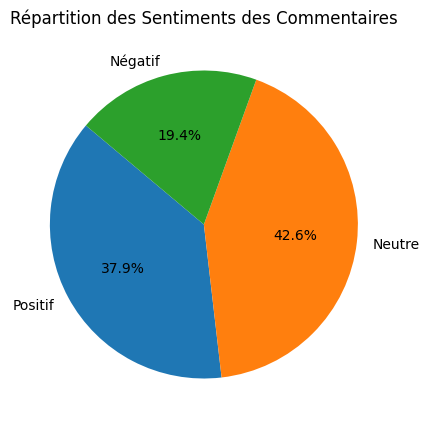

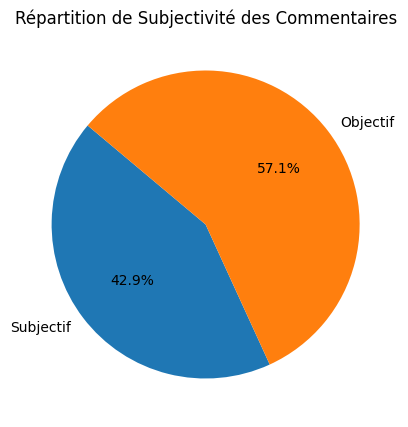

In [28]:
# Compter les commentaires positifs, neutres, négatifs, objectifs et subjectifs
positive_count = (df_commentaires['polarity_on_brut_text'] > 0).sum()
negative_count = (df_commentaires['polarity_on_brut_text'] < 0).sum()
neutral_count = (df_commentaires['polarity_on_brut_text'] == 0).sum()

subjective_count = (df_commentaires['subjectivity_on_brut_text'] > 0.5).sum()
objective_count = (df_commentaires['subjectivity_on_brut_text'] <= 0.5).sum()

# Diagramme circulaire pour la polarité
plt.figure(figsize=(8, 5))
plt.pie([positive_count, neutral_count, negative_count], labels=["Positif", "Neutre", "Négatif"], autopct='%1.1f%%', startangle=140)
plt.title("Répartition des Sentiments des Commentaires")
plt.show()

# Diagramme circulaire pour la subjectivité
plt.figure(figsize=(8, 5))
plt.pie([subjective_count, objective_count], labels=["Subjectif", "Objectif"], autopct='%1.1f%%', startangle=140)
plt.title("Répartition de Subjectivité des Commentaires")
plt.show()
